In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from zoneinfo import ZoneInfo
import matplotlib.dates as mdates

plt.rcParams.update({'font.size': 14}) # Set global font size to 18
plt.rcParams["figure.figsize"] = (10, 6) 

# dataset_path = "../data/dados_telemetria/teste_odonto_08122025/full"
# dataset_path = "../data/dados_telemetria/oficina_151225_comp/full/mike"
dataset_path = "../data/dados_telemetria/betim_161225/full"


# full_df = pd.read_csv(f'{dataset_path}/mike1_aceleracao3.csv')
# full_df.tail(20)

# dataset_path = "../data/dados_telemetria/betim_161225/full/"
dataset_path = "../data/dados_telemetria/teste_odonto_08122025/full/"
# full_df = pd.read_csv(f'{dataset_path}/full_df.csv')
csv_file_name = "miguelito1_aceleracao1.csv"
csv_folder = csv_file_name.split('_')[0]
full_df = pd.read_csv(f'{dataset_path}/{csv_folder}/{csv_file_name}')
# full_df = pd.read_csv(f'{dataset_path}/full_df.csv')
# full_df.columns
# full_df.shape

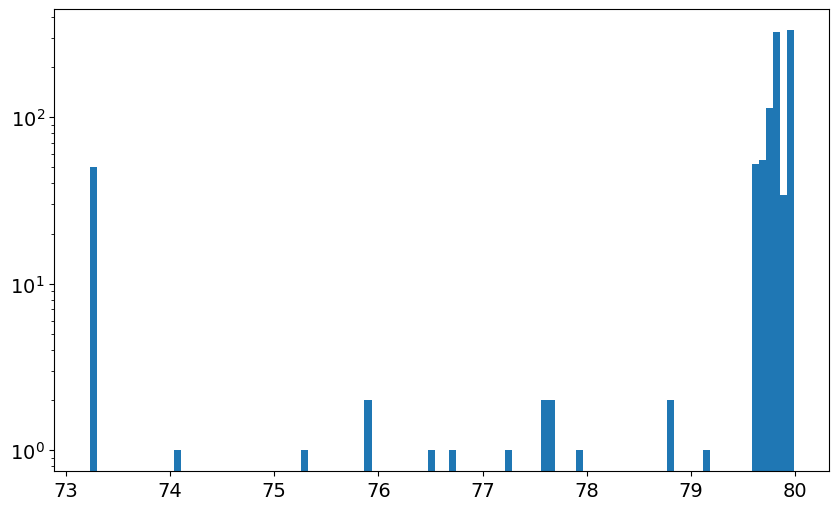

In [175]:
plt.hist(full_df['TOTAL_VOLTAGE'], bins = 100)
plt.yscale("log")
plt.show()

In [176]:
def get_range_by_time(timestamps, start_date, end_date):
    if end_date == -1 or start_date == -1:
        return range(len(timestamps))
    
    start_timestamp = start_date.timestamp() * 1000
    end_timestamp = end_date.timestamp() * 1000

    start_idx = -1
    for index, value in enumerate(timestamps):
        if value > start_timestamp:
            start_idx = index
            break

    if start_idx == -1: start_idx = 0

    end_idx = -1
    for index, value in enumerate(timestamps):
        if value > end_timestamp:
            end_idx = index
            break

    if end_idx == -1: end_idx = len(timestamps) - 1

    return range(start_idx, end_idx)

START_DATE = datetime(2025, 12, 8, 15, 38, 10, tzinfo=ZoneInfo("America/Sao_Paulo"))
END_DATE = datetime(2025, 12, 8, 15, 38, 17, tzinfo=ZoneInfo("America/Sao_Paulo"))
END_DATE = -1

range_plot = get_range_by_time(full_df['timestamp'], START_DATE, END_DATE)
timestamps_plot = full_df['timestamp'][range_plot] / 1000

# Convert Unix timestamps to datetime objects
dates_plot = [datetime.fromtimestamp(ts) for ts in timestamps_plot]


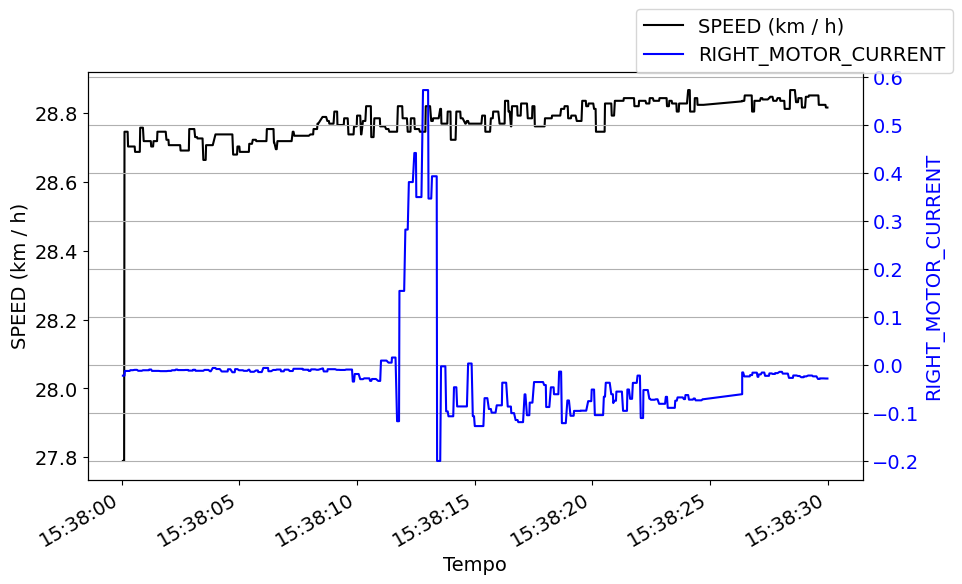

In [177]:
# car_velocity = (full_df['LEFT_MOTOR_CURRENT'] + full_df['RIGHT_MOTOR_CURRENT'])
car_velocity = full_df['ELETROBUILD_TEMPERATURE']
# car_velocity = (full_df['LEFT_MOTOR_SPEED'] + full_df['RIGHT_MOTOR_SPEED']) / 2
mode = full_df['ACCEL_LONGITUDINAL'] 

# Create the plot
fig, ax1 = plt.subplots()
ax1.plot(dates_plot, car_velocity[range_plot], color="black", label="SPEED (km / h)")
ax1.set_xlabel('Tempo')
ax1.set_ylabel('SPEED (km / h)', color='black')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

ax2.plot(dates_plot, mode[range_plot], color="blue", label="RIGHT_MOTOR_CURRENT")
ax2.set_ylabel('RIGHT_MOTOR_CURRENT', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

date_format = mdates.DateFormatter("%H:%M:%S")
ax1.xaxis.set_major_formatter(date_format)

# Optional: Rotate x-axis labels for better readability if they overlap
fig.autofmt_xdate()

# Optional: align legends
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

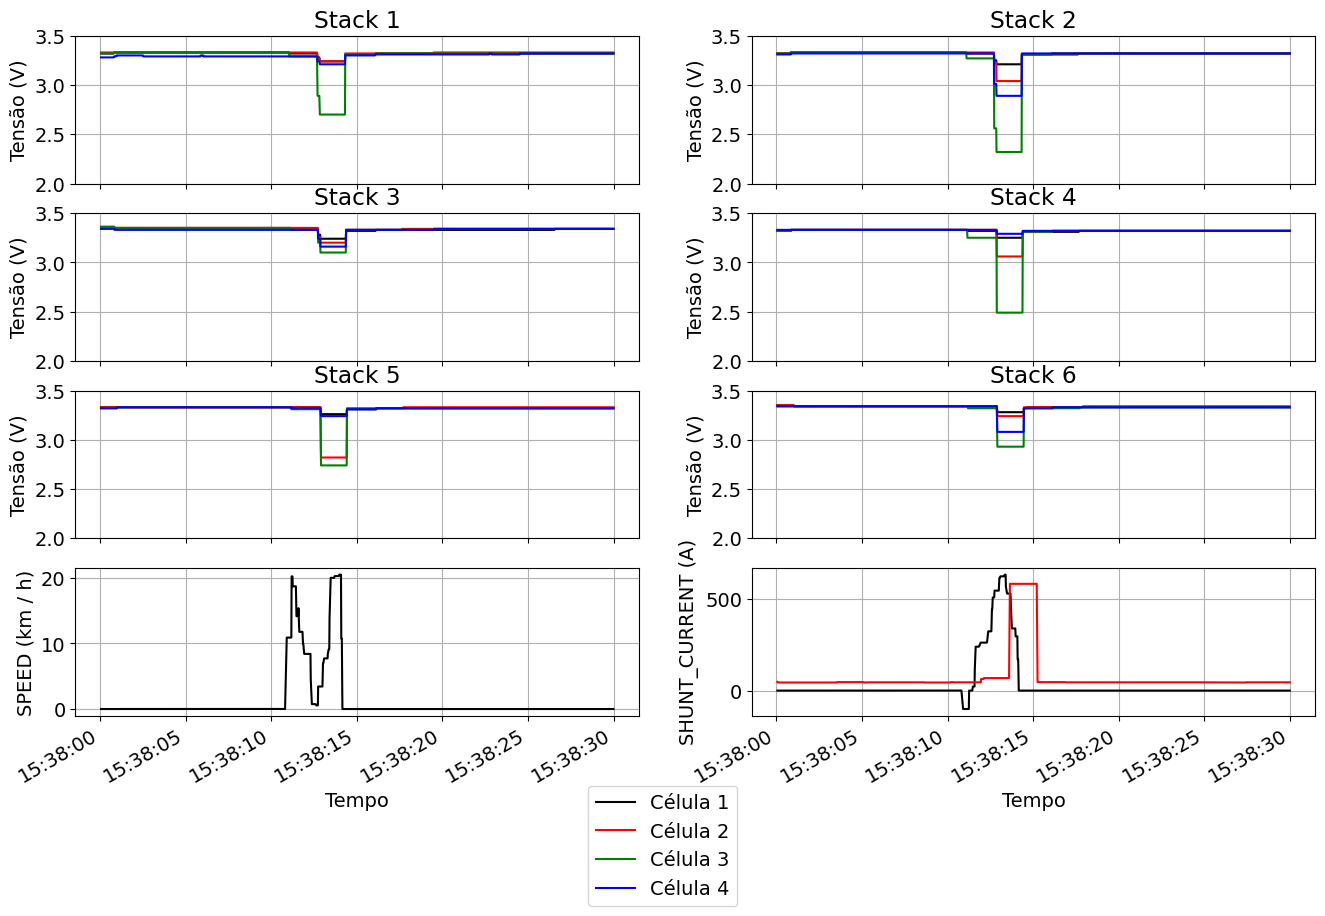

In [178]:
fig, axs = plt.subplots(4,2, figsize=(16,10)) # Adjust figsize as needed

Y_LIM_RANGE = (2, 3.5)

axs[0,0].plot(dates_plot, full_df['STACK_1_CELL_1'][range_plot], color="black", label='Célula 1')
axs[0,0].plot(dates_plot, full_df['STACK_1_CELL_2'][range_plot], color="red", label='Célula 2')
axs[0,0].plot(dates_plot, full_df['STACK_1_CELL_3'][range_plot], color="green", label='Célula 3')
axs[0,0].plot(dates_plot, full_df['STACK_1_CELL_4'][range_plot], color="blue", label='Célula 4')
axs[0,0].set_xlabel('Tempo')
axs[0,0].set_ylabel('Tensão (V)', color='black')
axs[0,0].set_ylim(Y_LIM_RANGE)
axs[0,0].set_title('Stack 1')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].grid()

axs[0,1].plot(dates_plot, full_df['STACK_2_CELL_1'][range_plot], color="black")
axs[0,1].plot(dates_plot, full_df['STACK_2_CELL_2'][range_plot], color="red")
axs[0,1].plot(dates_plot, full_df['STACK_2_CELL_3'][range_plot], color="green")
axs[0,1].plot(dates_plot, full_df['STACK_2_CELL_4'][range_plot], color="blue")
axs[0,1].set_xlabel('Tempo')
axs[0,1].set_ylabel('Tensão (V)', color='black')
axs[0,1].set_title('Stack 2')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].set_ylim(Y_LIM_RANGE)
axs[0,1].grid()

axs[1,0].plot(dates_plot, full_df['STACK_3_CELL_1'][range_plot], color="black")
axs[1,0].plot(dates_plot, full_df['STACK_3_CELL_2'][range_plot], color="red")
axs[1,0].plot(dates_plot, full_df['STACK_3_CELL_3'][range_plot], color="green")
axs[1,0].plot(dates_plot, full_df['STACK_3_CELL_4'][range_plot], color="blue")
axs[1,0].set_xlabel('Tempo')
axs[1,0].set_ylabel('Tensão (V)', color='black')
axs[1,0].set_title('Stack 3')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].set_ylim(Y_LIM_RANGE)
axs[1,0].grid()

axs[1,1].plot(dates_plot, full_df['STACK_4_CELL_1'][range_plot], color="black")
axs[1,1].plot(dates_plot, full_df['STACK_4_CELL_2'][range_plot], color="red")
axs[1,1].plot(dates_plot, full_df['STACK_4_CELL_3'][range_plot], color="green")
axs[1,1].plot(dates_plot, full_df['STACK_4_CELL_4'][range_plot], color="blue")
axs[1,1].set_xlabel('Tempo')
axs[1,1].set_ylabel('Tensão (V)', color='black')
axs[1,1].set_title('Stack 4')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].set_ylim(Y_LIM_RANGE)
axs[1,1].grid()

axs[2,0].plot(dates_plot, full_df['STACK_5_CELL_1'][range_plot], color="black")
axs[2,0].plot(dates_plot, full_df['STACK_5_CELL_2'][range_plot], color="red")
axs[2,0].plot(dates_plot, full_df['STACK_5_CELL_3'][range_plot], color="green")
axs[2,0].plot(dates_plot, full_df['STACK_5_CELL_4'][range_plot], color="blue")
axs[2,0].set_xlabel('Tempo')
axs[2,0].set_ylabel('Tensão (V)', color='black')
axs[2,0].set_title('Stack 5')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[2,0].xaxis.set_major_formatter(date_format)
axs[2,0].set_ylim(Y_LIM_RANGE)
axs[2,0].grid()

axs[2,1].plot(dates_plot, full_df['STACK_6_CELL_1'][range_plot], color="black")
axs[2,1].plot(dates_plot, full_df['STACK_6_CELL_2'][range_plot], color="red")
axs[2,1].plot(dates_plot, full_df['STACK_6_CELL_3'][range_plot], color="green")
axs[2,1].plot(dates_plot, full_df['STACK_6_CELL_4'][range_plot], color="blue")
axs[2,1].set_xlabel('Tempo')
axs[2,1].set_ylabel('Tensão (V)', color='black')
axs[2,1].set_title('Stack 6')
date_format = mdates.DateFormatter("%H:%M:%S")
axs[2,1].xaxis.set_major_formatter(date_format)
axs[2,1].set_ylim(Y_LIM_RANGE)
axs[2,1].grid()

axs[3,0].plot(dates_plot, full_df['VEHICLE_SPEED'][range_plot], color="black")
axs[3,0].set_xlabel('Tempo')
axs[3,0].set_ylabel('SPEED (km / h)', color='black')
axs[3,0].grid()

axs[3,1].plot(dates_plot, (full_df['RIGHT_MOTOR_CURRENT'] + full_df['LEFT_MOTOR_CURRENT'])[range_plot], color="black")
axs[3,1].plot(dates_plot, (full_df['SHUNT_CURRENT'])[range_plot], color="red")
axs[3,1].set_xlabel('Tempo')
axs[3,1].set_ylabel('SHUNT_CURRENT (A)', color='black')
axs[3,1].grid()

# Optional: Rotate x-axis labels for better readability if they overlap
fig.autofmt_xdate()

# Optional: align legends
fig.legend(loc='lower center')
plt.show()

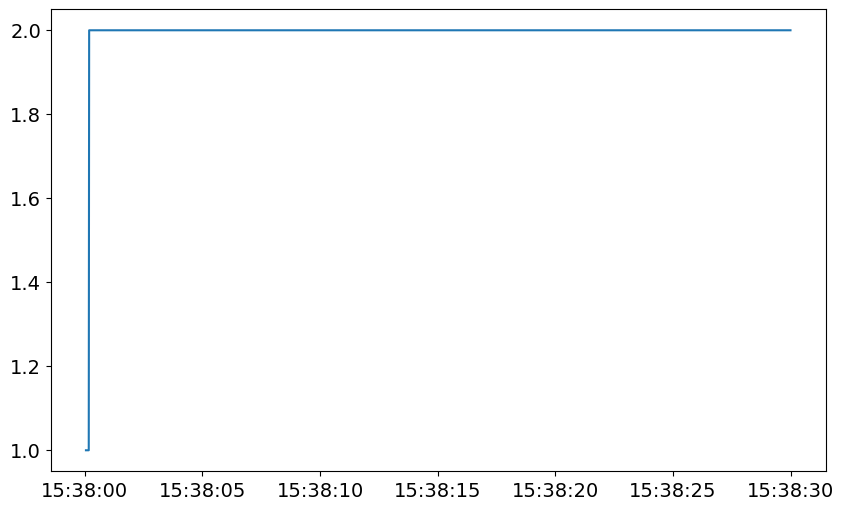

In [179]:
plt.plot(dates_plot, full_df['ECU_MODE_ID'][range_plot])
plt.show()

In [180]:
full_df.columns

Index(['timestamp', 'THROTTLE', 'BRAKE', 'ECU_MODE_ID', 'TORQUE_GAIN',
       'TORQUE_REF_LEFT_MOTOR', 'TORQUE_REF_RIGHT_MOTOR', 'LEFT_MOTOR_RPM',
       'LEFT_MOTOR_TORQUE', 'LEFT_MOTOR_CURRENT', 'RIGHT_MOTOR_RPM',
       'RIGHT_MOTOR_TORQUE', 'RIGHT_MOTOR_CURRENT', 'REAR_LEFT_WHEEL_SPEED',
       'REAR_RIGHT_WHEEL_SPEED', 'FRONT_LEFT_WHEEL_SPEED',
       'FRONT_RIGHT_WHEEL_SPEED', 'ACCEL_LONGITUDINAL', 'ACCEL_LATERAL',
       'ACCEL_NORMAL', 'VEL_ANGULAR_YAW', 'VEL_ANGULAR_PITCH',
       'VEL_ANGULAR_ROLL', 'ELETROBUILD_TEMPERATURE', 'STACK_1_CELL_1',
       'STACK_1_CELL_2', 'STACK_1_CELL_3', 'STACK_1_CELL_4', 'STACK_2_CELL_1',
       'STACK_2_CELL_2', 'STACK_2_CELL_3', 'STACK_2_CELL_4', 'STACK_3_CELL_1',
       'STACK_3_CELL_2', 'STACK_3_CELL_3', 'STACK_3_CELL_4', 'STACK_4_CELL_1',
       'STACK_4_CELL_2', 'STACK_4_CELL_3', 'STACK_4_CELL_4', 'STACK_5_CELL_1',
       'STACK_5_CELL_2', 'STACK_5_CELL_3', 'STACK_5_CELL_4', 'STACK_6_CELL_1',
       'STACK_6_CELL_2', 'STACK_6_CELL_3', 'S

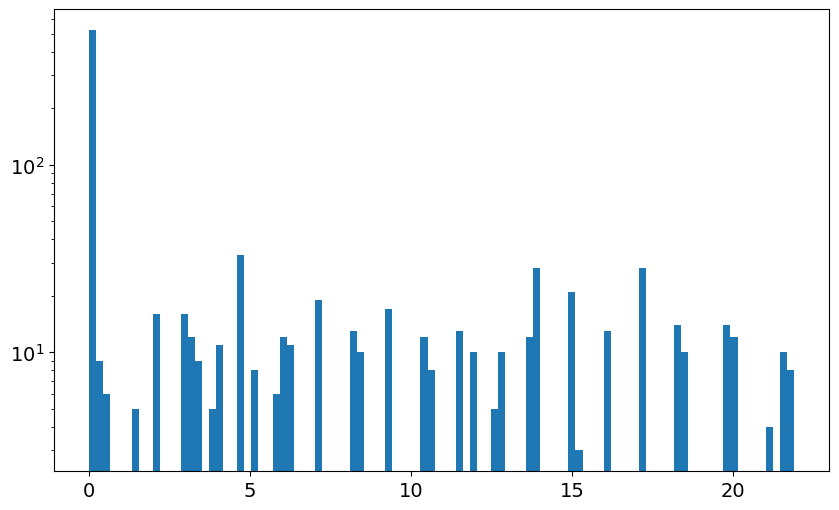

In [181]:
plt.hist(full_df['FRONT_LEFT_WHEEL_SPEED'], bins = 100)
plt.yscale("log")
plt.show()

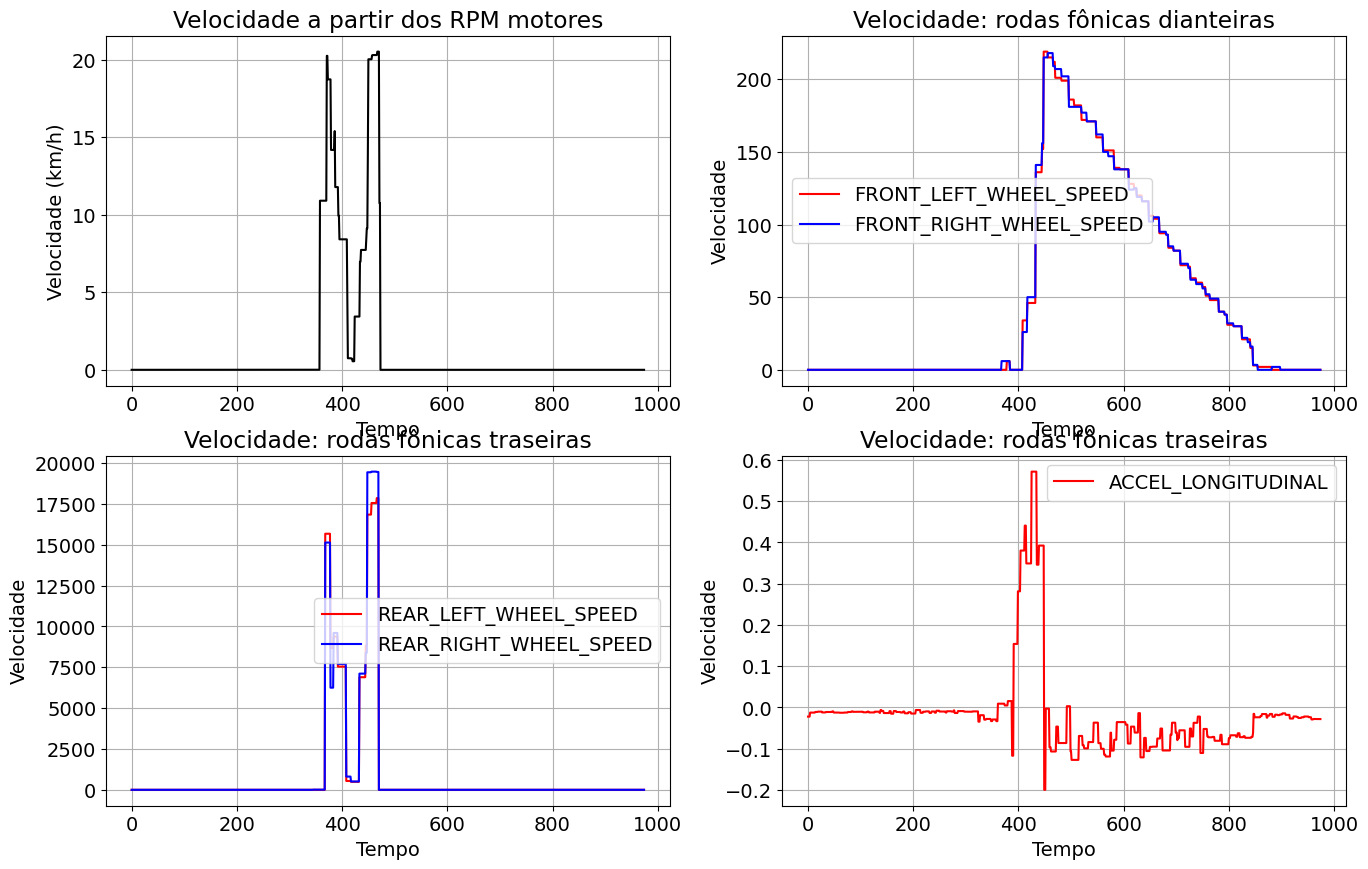

In [182]:
fig, axs = plt.subplots(2,2, figsize=(16,10)) # Adjust figsize as needed

axs[0,0].plot(full_df['VEHICLE_SPEED'][range_plot], color="black", label='VEHICLE_SPEED (km/h)')
axs[0,0].set_xlabel('Tempo')
axs[0,0].set_ylabel('Velocidade (km/h)', color='black')
axs[0,0].set_title('Velocidade a partir dos RPM motores')
# date_format = mdates.DateFormatter("%H:%M:%S")
# axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].grid()

axs[0,1].plot(full_df['FRONT_LEFT_WHEEL_SPEED'][range_plot] * 10, color="red", label='FRONT_LEFT_WHEEL_SPEED')
axs[0,1].plot(full_df['FRONT_RIGHT_WHEEL_SPEED'][range_plot] * 10, color="blue", label='FRONT_RIGHT_WHEEL_SPEED')
axs[0,1].set_xlabel('Tempo')
axs[0,1].set_ylabel('Velocidade', color='black')
axs[0,1].set_title('Velocidade: rodas fônicas dianteiras')
# date_format = mdates.DateFormatter("%H:%M:%S")
# axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(full_df['REAR_LEFT_WHEEL_SPEED'][range_plot] * 10, color="red", label='REAR_LEFT_WHEEL_SPEED')
axs[1,0].plot(full_df['REAR_RIGHT_WHEEL_SPEED'][range_plot] * 10, color="blue", label='REAR_RIGHT_WHEEL_SPEED')
axs[1,0].set_xlabel('Tempo')
axs[1,0].set_ylabel('Velocidade', color='black')
axs[1,0].set_title('Velocidade: rodas fônicas traseiras')
# date_format = mdates.DateFormatter("%H:%M:%S")
# axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(full_df['ACCEL_LONGITUDINAL'][range_plot], color="red", label='ACCEL_LONGITUDINAL')
axs[1,1].set_xlabel('Tempo')
axs[1,1].set_ylabel('Velocidade', color='black')
axs[1,1].set_title('Velocidade: rodas fônicas traseiras')
# date_format = mdates.DateFormatter("%H:%M:%S")
# axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].grid()
axs[1,1].legend()

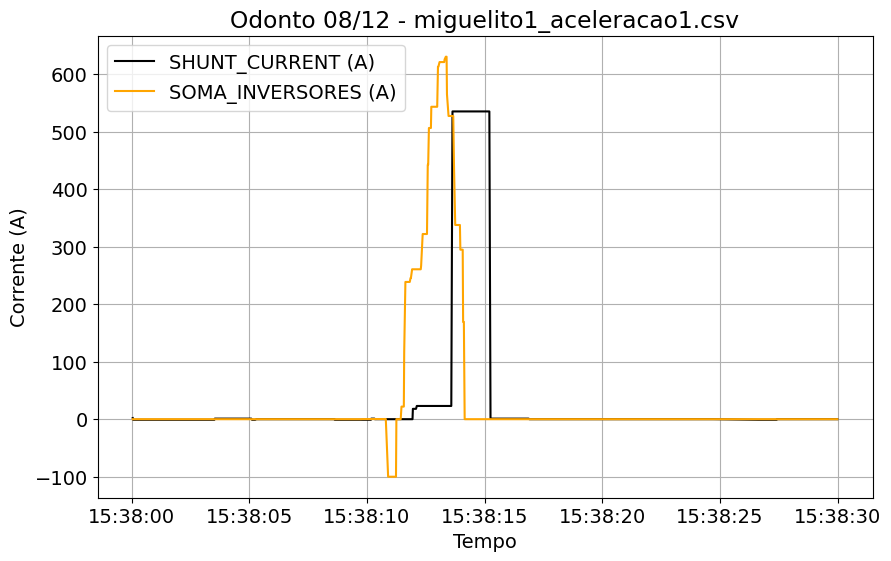

In [183]:
plt.plot(dates_plot, full_df['SHUNT_CURRENT'][range_plot] - 45, label="SHUNT_CURRENT (A)", color="black")
plt.plot(dates_plot, full_df['RIGHT_MOTOR_CURRENT'][range_plot] + full_df['LEFT_MOTOR_CURRENT'][range_plot], label="SOMA_INVERSORES (A)", color="orange")
plt.ylabel("Corrente (A)")
plt.xlabel("Tempo")
plt.title(f"Odonto 08/12 - {csv_file_name}")
plt.grid()
plt.legend(loc="upper left")
plt.show()